In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importamos el CSV

In [15]:
"""Cargamos el set de datos"""
df = pd.read_csv('Datasets/online_shoppers_intention.csv', encoding = 'unicode_escape')

# Visualizacion de los datos

In [16]:
"""Visualizamos los datos"""
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [17]:
"""Las dimensiones del set de datos"""
df.shape

(12330, 18)

In [18]:
"""Resumen de los datos"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [21]:
"""Revision de datos corruptos"""
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
"""Usamos describe para revisar los valores de los datos"""
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


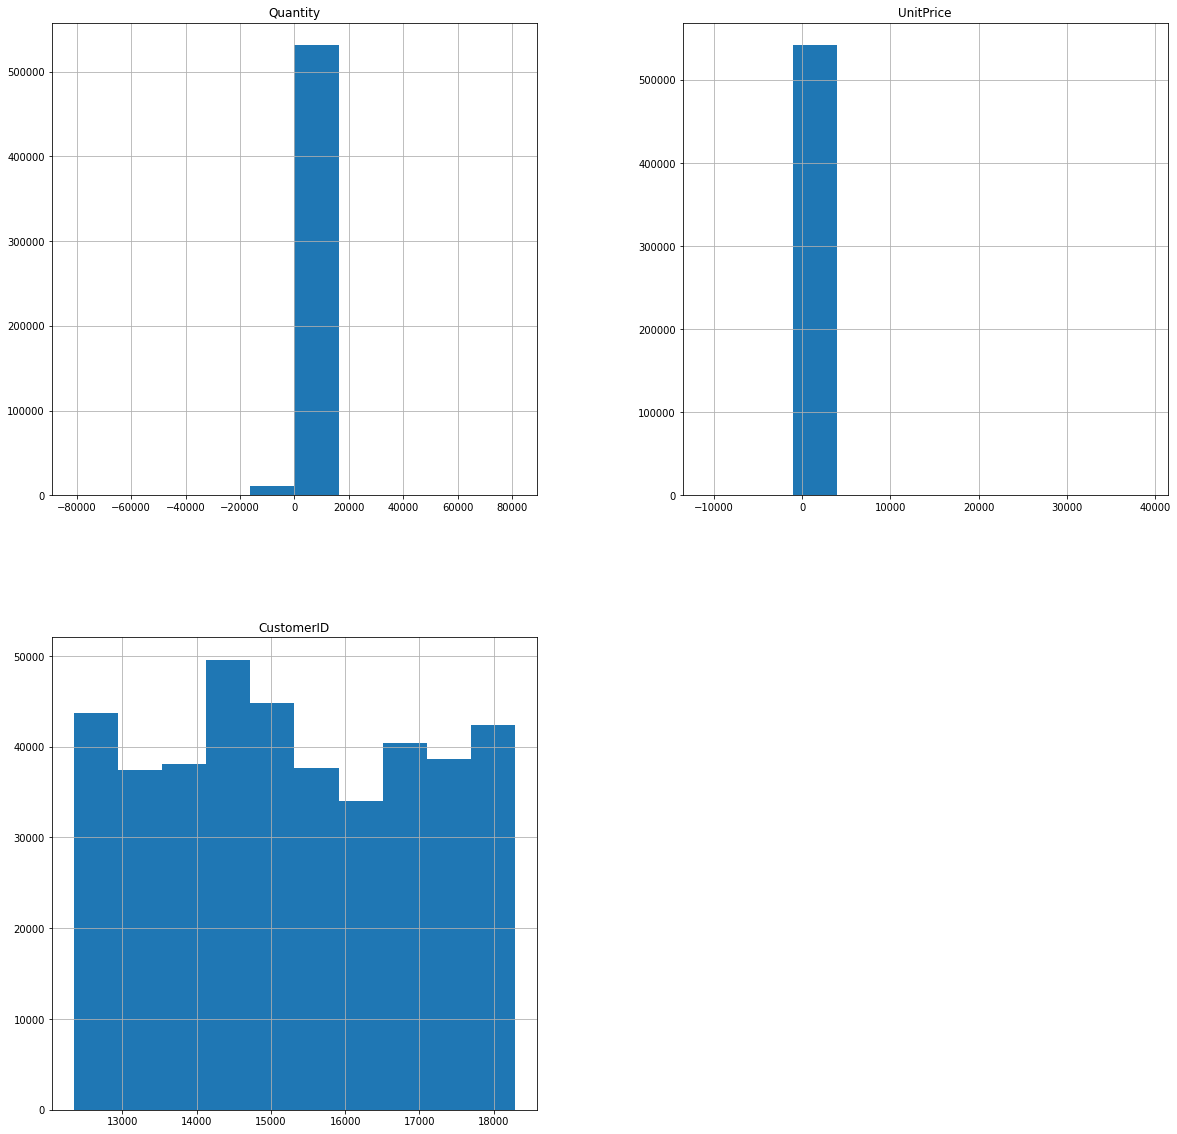

In [ ]:
"""Distribucion de los datos"""
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

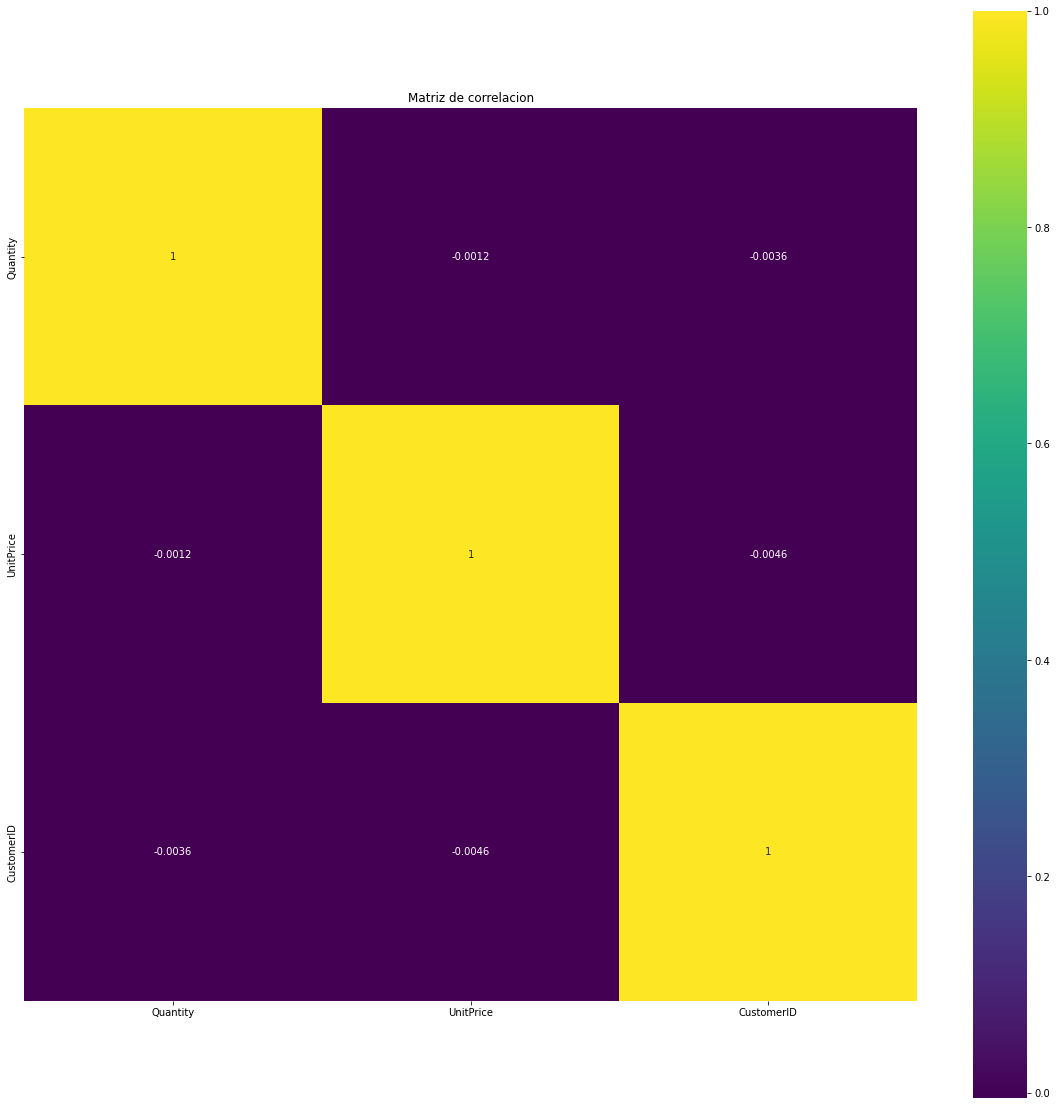

In [ ]:
"""Matriz de correlacion de los datos"""
cor = df.corr()
plt.figure(figsize=(20,20))
ax = sns.heatmap(cor, vmax=1, square=True, annot=True, cmap='viridis')
plt.title("Matriz de correlacion")
plt.show()

# Preprocesamiento

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
"""Eliminamos Description, InvoiceDate y CustomerId"""
cut = df.drop(columns = ['Description', 'InvoiceDate', 'CustomerID'])

In [ ]:
"""Usamos labelencoder para tranformar nuestro datos en str a numericos"""
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
cut['Country'] = encoder.fit_transform(cut['Country'])
cut['InvoiceNo'] = encoder.fit_transform(cut['InvoiceNo'])
cut['StockCode'] = encoder.fit_transform(cut['StockCode'])

In [ ]:
cut.shape
dt = cut

In [ ]:
"""Convertimos nuestro datos a un array"""
array = dt.values
X = array[:, 0:4]

In [ ]:
"""Preprocesamos los datos con un Standar Scaler y una normalizacion"""
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler(feature_range=(0,1))
rescalerX = scaler.fit_transform(X)

estandar = StandardScaler().fit(rescalerX)
estandarX = estandar.transform(rescalerX)

X = estandarX

# Clusters

In [ ]:
"""Importamos Kmeans"""
from sklearn.cluster import KMeans

In [ ]:
"""Creamos una funcion que reciba los datos y el numeros de clusters que tenga"""
def get_clusters(data, max_kmeans):
    """Se crean dos listas"""
    inertias = []
    means = []

    """Se recorre desde el 1 hasta el numero que se le pase por la funcion"""
    for i in range(1, max_kmeans):
        kmeans = KMeans(n_clusters=i ,max_iter = 300, random_state=0).fit(data)
        """Se mete la informacion en means"""
        means.append(i)
        inertias.append(kmeans.inertia_)
    
    fig = plt.subplots(figsize = (10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Numero de clusters')
    plt.ylabel('Inertias')
    plt.grid(True)
    plt.show()

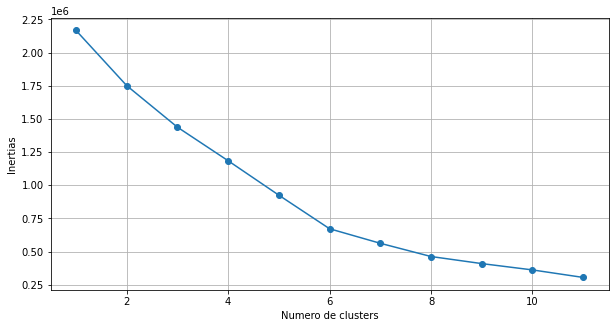

In [ ]:
"""A la funcion le pasamos el set de datos mas el numero de clusters"""
get_clusters(X, 12)

In [ ]:
"""Usamos kmeans y definimos el numero de clusters, en este caso 6"""
clustering = KMeans(n_clusters=6, random_state=0).fit(X)
label = clustering.predict(X)
center = clustering.cluster_centers_

In [ ]:
dt['Cluster'] = clustering.labels_
dt.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,Country,Cluster
0,0,3536,6,2.55,36,0
1,0,2794,6,3.39,36,0
2,0,3044,8,2.75,36,0
3,0,2985,6,3.39,36,0
4,0,2984,6,3.39,36,0


# Modelado

In [ ]:
"""Graficamos"""
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels


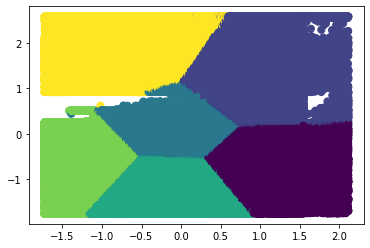

In [ ]:
centers, labels = find_clusters(X, 6, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');